In [114]:
import numpy as np
import pandas as pd
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for datetime operations
import datetime as dt

#for stats and plotting
import scipy.stats as stat
import pylab 

#for feature scaling
from sklearn.preprocessing import StandardScaler

#library for using K-Means algorithm
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [116]:
#read the dataset and store it into a dataframe
df_data = pd.read_csv('online_retail_II.csv')
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [118]:
#check the number of rows and columns present
df_data.shape

(1067371, 8)

In [9]:
#Check the feature datatypes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [11]:
#making sure the above observation is correct
df_data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [13]:
cust_country = df_data[['Country', 'Customer ID']].drop_duplicates()
cust_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)
#df_data.groupby(['Country'])['Customer ID'].head()

,Country,Customer ID
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


In [15]:
#keep only UK customer data
df_data = df_data.query("Country== 'United Kingdom'").reset_index(drop=True)

In [17]:
#From the df_info() command we can see that the 'Customer ID' feature has some null values
print('Number of customers having no ID: ',df_data['Customer ID'].isnull().sum())

Number of customers having no ID:  240029


In [19]:
#Ignore the transactions where there is no Customer ID
df_data = df_data[df_data['Customer ID'].notna()==True]

In [21]:
#As per our understanding, the Price feature does not contain any NULL values
#Check if there is any record with Price = 0
df_data[df_data['Price']==0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4399,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6424,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
15306,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
17855,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
17856,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom


In [23]:
#Check if there are any negative values in Price
df_data[df_data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [25]:
#We will drop the records who have Price as 0
index_name = df_data[(df_data['Price']==0)].index
df_data.drop(index_name, inplace = True)

In [27]:
#data start
df_data['InvoiceDate'].min()

'2009-12-01 07:45:00'

In [29]:
#data stop
df_data['InvoiceDate'].max()

'2011-12-09 12:49:00'

In [31]:
#Check if there are any values as 0
df_data[df_data['Quantity']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [33]:
#Check if there are any negative values
df_data[df_data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
157,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
158,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
159,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
160,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
161,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
...,...,...,...,...,...,...,...,...
979985,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
981041,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
981215,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
981216,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [35]:
#We will drop the records who have been cancelled -> Invoice start with C
index_name = df_data[(df_data['Quantity']<0)].index
df_data.drop(index_name, inplace = True)

In [37]:
df_data[df_data['Description'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [39]:
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [41]:
#Create a new feature named TotalPrice by multiplying Quantity and Price feature
df_data['TotalPrice'] = df_data['Quantity'] * df_data['Price']

In [43]:
#Get the top customers
df_data.groupby("Customer ID")["TotalPrice"].sum()

Customer ID
12346.0    77556.46
12608.0      415.79
12745.0      723.85
12746.0      254.55
12747.0     9276.54
             ...   
18283.0     2736.65
18284.0      461.68
18285.0      427.00
18286.0     1296.43
18287.0     4182.99
Name: TotalPrice, Length: 5350, dtype: float64

In [45]:
#data after cleaning
df_data2 = df_data.copy(deep=True)
df_data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [47]:
df_data2.shape

(725250, 9)

In [49]:
#We will assign the next day after the last date recorded in the dataset as 'today_date'
today_date = dt.datetime(2011, 12, 11)

In [51]:
#We will change the datatype of InvoiceDate to datetime from object
df_data2['InvoiceDate'] = df_data2['InvoiceDate'].astype('datetime64')

In [53]:
rfm = df_data2.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [55]:
rfm=rfm.reset_index()
rfm.head()

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346.0,326,12,77556.46
1,12608.0,405,1,415.79
2,12745.0,487,2,723.85
3,12746.0,541,1,254.55
4,12747.0,3,26,9276.54


In [57]:
#renaming the column names
rfm.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12608.0,405,1,415.79
2,12745.0,487,2,723.85
3,12746.0,541,1,254.55
4,12747.0,3,26,9276.54


In [59]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000,5350.000000
mean,15557.362617,203.546168,6.269346,2751.990190
std,1581.161762,209.973818,11.995550,12080.466564
min,12346.000000,1.000000,1.000000,2.950000
25%,14191.250000,26.000000,1.000000,336.167500
50%,15565.500000,99.000000,3.000000,849.910000
75%,16922.750000,382.000000,7.000000,2214.905000
max,18287.000000,739.000000,336.000000,608821.650000


In [61]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [63]:
quantiles

{'CustomerID': {0.25: 14191.25, 0.5: 15565.5, 0.75: 16922.75},
 'Recency': {0.25: 26.0, 0.5: 99.0, 0.75: 382.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'Monetary': {0.25: 336.1675000000001, 0.5: 849.9100000000001, 0.75: 2214.905}}

In [65]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [67]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm['R'] = rfm['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm['M'] = rfm['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,12,77556.46,3,1,1
1,12608.0,405,1,415.79,4,4,3
2,12745.0,487,2,723.85,4,3,3
3,12746.0,541,1,254.55,4,4,4
4,12747.0,3,26,9276.54,1,1,1


In [69]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346.0,326,12,77556.46,3,1,1,311,5
1,12608.0,405,1,415.79,4,4,3,443,11
2,12745.0,487,2,723.85,4,3,3,433,10
3,12746.0,541,1,254.55,4,4,4,444,12
4,12747.0,3,26,9276.54,1,1,1,111,3


In [71]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm.RFMScore, q = 4, labels = Loyalty_Level)
rfm['RFM_Loyalty_Level'] = Score_cuts.values
rfm.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,12346.0,326,12,77556.46,3,1,1,311,5,Platinum
1,1,12608.0,405,1,415.79,4,4,3,443,11,Bronze
2,2,12745.0,487,2,723.85,4,3,3,433,10,Silver
3,3,12746.0,541,1,254.55,4,4,4,444,12,Bronze
4,4,12747.0,3,26,9276.54,1,1,1,111,3,Platinum


In [73]:
#Validate the data for RFMGroup = 111
rfm[rfm['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,5165,18102.0,1,145,608821.65,1,1,1,111,3,Platinum
1,4527,17450.0,9,51,246973.09,1,1,1,111,3,Platinum
2,857,13694.0,4,143,196482.81,1,1,1,111,3,Platinum
3,4585,17511.0,3,60,175603.55,1,1,1,111,3,Platinum
4,3776,16684.0,5,55,147142.77,1,1,1,111,3,Platinum


<Axes: xlabel='Monetary', ylabel='Density'>

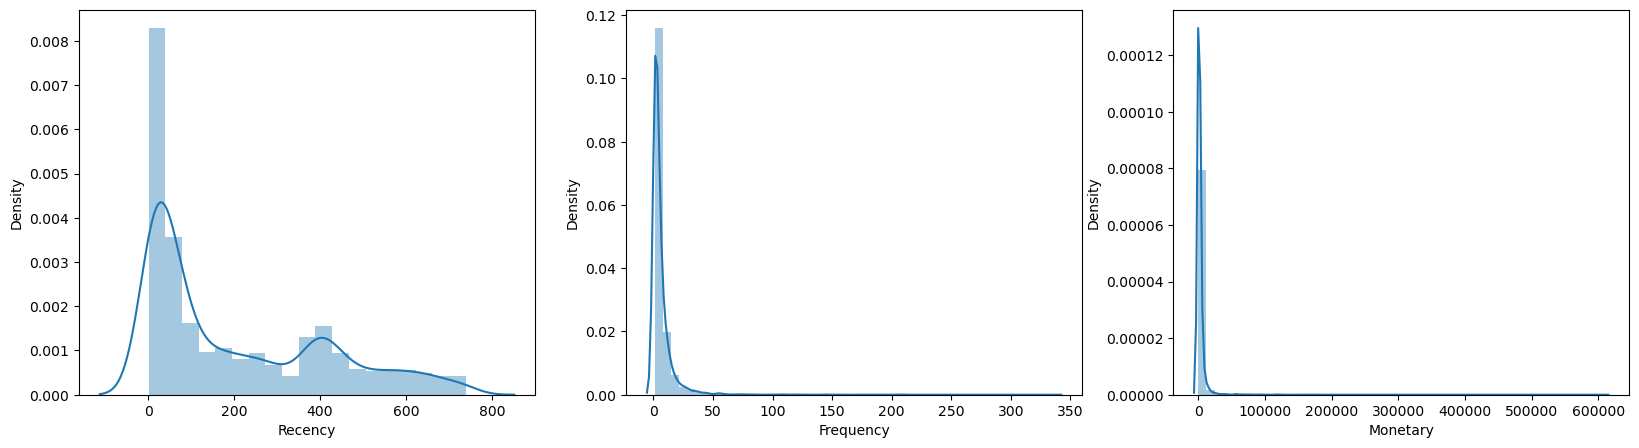

In [75]:
#Plot data distribution
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm['Monetary'])

In [77]:
#apply log transformation 
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

In [79]:
rfm_log.head()

,Recency,Frequency,Monetary
0,5.787,2.485,11.259
1,6.004,0.000,6.030
2,6.188,0.693,6.585
3,6.293,0.000,5.539
4,1.099,3.258,9.135


<Axes: xlabel='Monetary', ylabel='Density'>

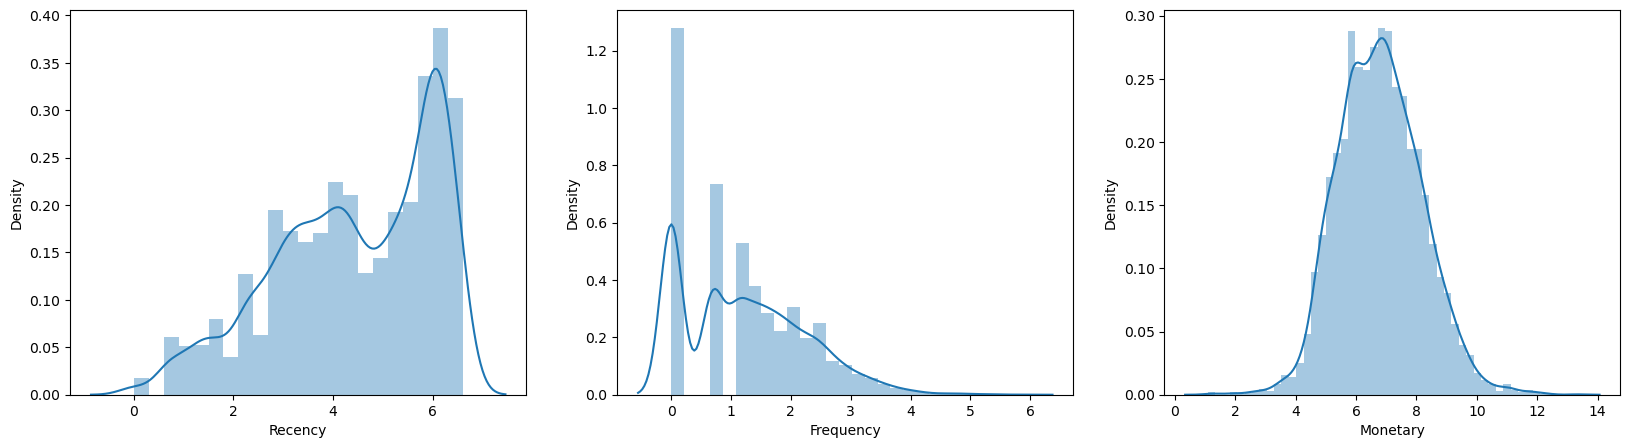

In [81]:
#Plot data distribution after log transformation
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(rfm_log['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm_log['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm_log['Monetary'])

In [83]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,5350.000000,5350.000000,5350.000000
mean,4.442442,1.208028,6.793477
std,1.596148,1.030144,1.380669
min,0.000000,0.000000,1.082000
25%,3.258000,0.000000,5.817250
50%,4.595000,1.099000,6.745000
75%,5.945000,1.946000,7.702750
max,6.605000,5.817000,13.319000


In [85]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [87]:
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns= rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.842456,1.239721,3.234622
1,0.978421,-1.172788,-0.553028
2,1.093709,-0.500003,-0.151011
3,1.159499,-1.172788,-0.908686
4,-2.094890,1.990171,1.696093


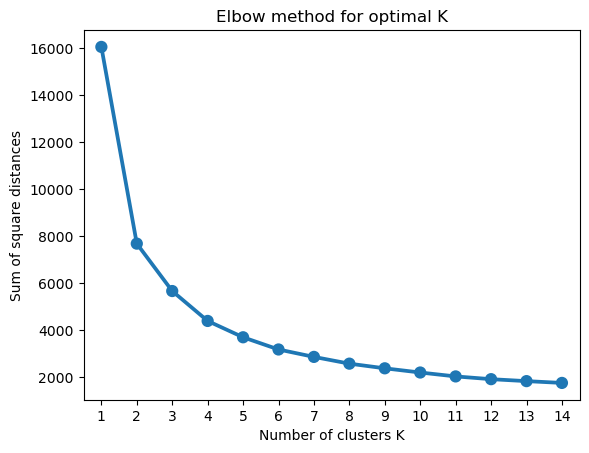

In [89]:
#wcss stands for within cluster sum of squares
wcss={}

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(rfm_scaled)
    wcss[k] = km.inertia_
    
#Plot graph for the wcss values and the number of clusters
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of square distances')
plt.title('Elbow method for optimal K')
plt.show()

In [90]:
#Build K Means clustering model using K=4
kmean_model = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(rfm_scaled)

#find the clusters for the records given in our dataset
rfm['Cluster'] = kmean_model.labels_

#check the datset
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,12346.0,326,12,77556.46,3,1,1,311,5,Platinum,0
1,12608.0,405,1,415.79,4,4,3,443,11,Bronze,2
2,12745.0,487,2,723.85,4,3,3,433,10,Silver,2
3,12746.0,541,1,254.55,4,4,4,444,12,Bronze,2
4,12747.0,3,26,9276.54,1,1,1,111,3,Platinum,0


In [91]:
rfm.Cluster.value_counts()

2    1803
3    1387
0    1095
1    1065
Name: Cluster, dtype: int64

In [95]:
rfm[rfm['Cluster']==0].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.0
mean,15538.041096,27.221918,18.951598,9803.693111,1.366210,1.115068,1.100457,3.581735,0.0
std,1580.177756,39.903781,21.876679,25362.591538,0.555963,0.324926,0.300745,0.687067,0.0
min,12346.000000,1.000000,2.000000,862.420000,1.000000,1.000000,1.000000,3.000000,0.0
25%,14190.000000,6.000000,9.000000,3053.525000,1.000000,1.000000,1.000000,3.000000,0.0
50%,15555.000000,17.000000,13.000000,4867.720000,1.000000,1.000000,1.000000,3.000000,0.0
75%,16925.500000,32.000000,20.000000,8681.525000,2.000000,1.000000,1.000000,4.000000,0.0
max,18287.000000,498.000000,336.000000,608821.650000,4.000000,3.000000,2.000000,6.000000,0.0


In [97]:
rfm[rfm['Cluster']==1].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.0
mean,15608.105164,28.214085,3.122066,835.371147,1.430047,2.792488,2.722066,6.944601,1.0
std,1578.222537,20.350020,1.627458,536.807675,0.497209,0.689025,0.740689,1.370929,0.0
min,12822.000000,1.000000,1.000000,49.800000,1.000000,1.000000,1.000000,4.000000,1.0
25%,14289.000000,12.000000,2.000000,423.850000,1.000000,2.000000,2.000000,6.000000,1.0
50%,15594.000000,24.000000,3.000000,743.110000,1.000000,3.000000,3.000000,7.000000,1.0
75%,16969.000000,39.000000,4.000000,1115.680000,2.000000,3.000000,3.000000,8.000000,1.0
max,18282.000000,100.000000,14.000000,3861.000000,3.000000,4.000000,4.000000,10.000000,1.0


In [99]:
rfm[rfm['Cluster']==2].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.0
mean,15583.559068,390.540765,1.313367,308.450245,3.462008,3.723239,3.622851,10.808098,2.0
std,1597.125410,194.888360,0.549416,224.209145,0.683623,0.454901,0.531754,1.016949,0.0
min,12608.000000,19.000000,1.000000,2.950000,1.000000,2.000000,2.000000,8.000000,2.0
25%,14198.500000,240.000000,1.000000,152.275000,3.000000,3.000000,3.000000,10.000000,2.0
50%,15564.000000,402.000000,1.000000,258.700000,4.000000,4.000000,4.000000,11.000000,2.0
75%,16972.500000,547.000000,2.000000,403.140000,4.000000,4.000000,4.000000,12.000000,2.0
max,18285.000000,739.000000,4.000000,2135.460000,4.000000,4.000000,4.000000,12.000000,2.0


In [101]:
rfm[rfm['Cluster']==3].describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,Cluster
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.0
mean,15499.600577,234.297765,5.116078,1832.947006,2.955299,2.163663,1.974766,7.093727,3.0
std,1562.881183,156.776737,2.679126,2114.348357,0.691751,0.677322,0.681712,1.454905,0.0
min,12831.000000,32.000000,1.000000,167.420000,2.000000,1.000000,1.000000,4.000000,3.0
25%,14139.000000,95.000000,3.000000,920.445000,2.000000,2.000000,2.000000,6.000000,3.0
50%,15542.000000,190.000000,4.000000,1388.410000,3.000000,2.000000,2.000000,7.000000,3.0
75%,16808.500000,374.000000,6.000000,2150.020000,3.000000,3.000000,2.000000,8.000000,3.0
max,18286.000000,739.000000,20.000000,44534.300000,4.000000,4.000000,4.000000,10.000000,3.0


<Figure size 700x700 with 0 Axes>

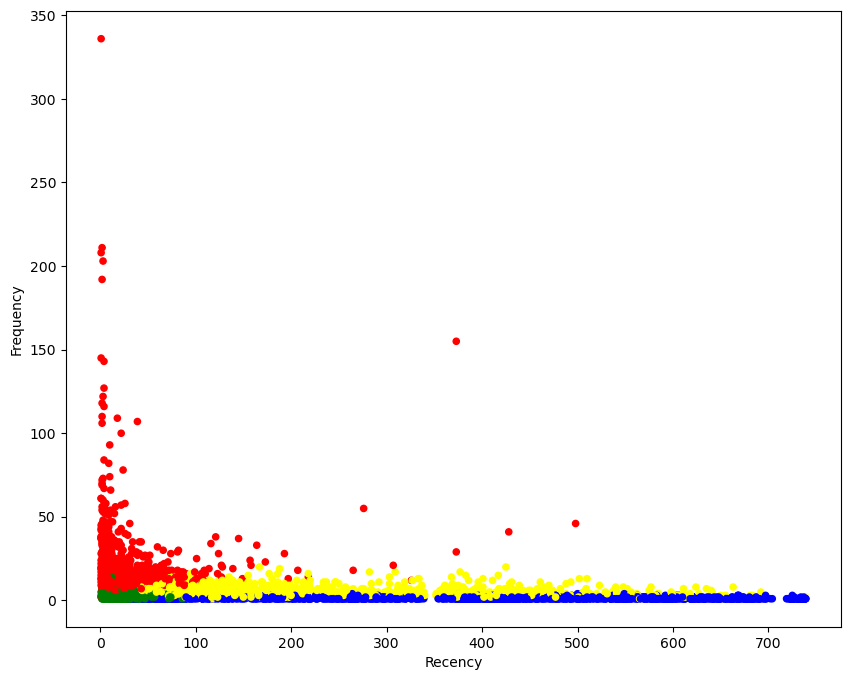

In [103]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = rfm['Color']
)

In [105]:
rfm['RFM_Loyalty_Level'].value_counts()

Gold        1603
Platinum    1524
Silver      1120
Bronze      1103
Name: RFM_Loyalty_Level, dtype: int64

In [107]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,12346.0,326,12,77556.46,3,1,1,311,5,Platinum,0,red
1,12608.0,405,1,415.79,4,4,3,443,11,Bronze,2,blue
2,12745.0,487,2,723.85,4,3,3,433,10,Silver,2,blue
3,12746.0,541,1,254.55,4,4,4,444,12,Bronze,2,blue
4,12747.0,3,26,9276.54,1,1,1,111,3,Platinum,0,red
